In [1]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
publications = json.load(open('../../data/json/depositonce/publications.json'))
subject_count = {key: len(value) for key, value in publications.items()}

In [3]:
print(f"There are {len(publications)} publications in this repository.")
print(f"Publications have {round(sum(subject_count.values()) / len(subject_count), 1)} subjects on average.")

There are 11275 publications in this repository.
Publications have 8.6 subjects on average.


In [4]:
groups = {}  # n -> no. of publications with n subjects
for cnt in subject_count.values():
    if cnt not in groups:
        groups[cnt] = 0
    groups[cnt] += 1
groups = Counter(groups)

In [5]:
print(f'{groups[0]} publications don\'t have any subjects ({round(groups[0]/len(publications), 2)}%)')
total = groups[0] + groups[1] + groups[2]
print(f'{total} publications have less than three subjects ({round(total/len(publications), 2)}%).')
total = sum([value for key, value in groups.items() if key > 10])
print(f'{total} publications have more than ten subjects ({round(total/len(publications), 2)}%).')

0 publications don't have any subjects (0.0%)
476 publications have less than three subjects (0.04%).
4046 publications have more than ten subjects (0.36%).


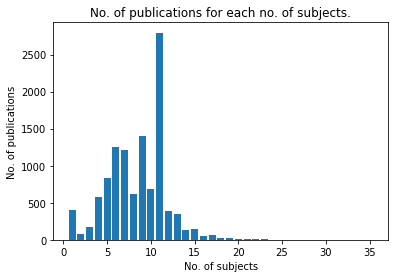

In [6]:
sorted_groups = sorted(groups.items())
x, y = zip(*sorted_groups)
plt.bar(x, y)
plt.title('No. of publications for each no. of subjects.')
plt.xlabel('No. of subjects')
plt.ylabel('No. of publications')
plt.show()